In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
'''-----plt：中文------'''
import matplotlib
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])
matplotlib.rcParams['font.family'] = ['Heiti TC']

[FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]


In [82]:
file_path = r"CDNOW_master.txt"
# names 表名
# sep 空格分格
data = pd.read_csv(file_path,names=["用户","时间","数量","金额"],sep="\s+")

In [83]:
data

,用户,时间,数量,金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


# 数据预处理

In [84]:
# 统计null的数量.sum()
data.isnull().sum()

用户    0
时间    0
数量    0
金额    0
dtype: int64

In [85]:
clean_data = pd.to_datetime(data['时间'],format="%Y%m%d")
clean_data

0       1997-01-01
1       1997-01-12
2       1997-01-12
3       1997-01-02
4       1997-03-30
           ...    
69654   1997-04-05
69655   1997-04-22
69656   1997-03-25
69657   1997-03-25
69658   1997-03-26
Name: 时间, Length: 69659, dtype: datetime64[ns]

In [86]:
data['时间'] = clean_data
data

,用户,时间,数量,金额
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [87]:
# 按月份统计
data_month = clean_data.values.astype("datetime64[M]")
data_month

array(['1997-01', '1997-01', '1997-01', ..., '1997-03', '1997-03',
       '1997-03'], dtype='datetime64[M]')

In [88]:
data["月份"] = data_month
data

,用户,时间,数量,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


# 数据分析-用户总体消费趋势分析

In [89]:
# 数据聚合
data_pivot = data.pivot_table(index="月份",
                values=["用户","数量","金额"],
                aggfunc={"用户":"count","数量":"sum","金额":"sum"})
data_pivot

,数量,用户,金额
月份,,,
1997-01-01,19416,8928,299060.17
1997-02-01,24921,11272,379590.03
1997-03-01,26159,11598,393155.27
1997-04-01,9729,3781,142824.49
1997-05-01,7275,2895,107933.30
1997-06-01,7301,3054,108395.87
1997-07-01,8131,2942,122078.88
1997-08-01,5851,2320,88367.69
1997-09-01,5729,2296,81948.80


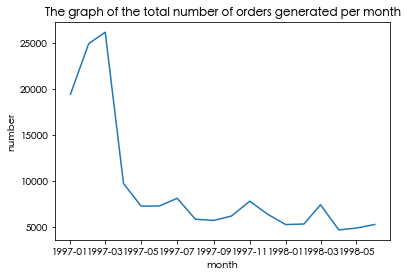

In [90]:
plt.plot(data_pivot["数量"])
plt.title("The graph of the total number of orders generated per month")
plt.xlabel("month")
plt.ylabel("number")
plt.show()

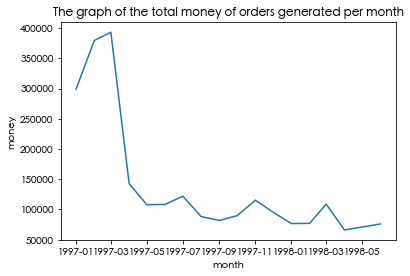

In [91]:
plt.plot(data_pivot["金额"])
plt.title("The graph of the total money of orders generated per month")
plt.xlabel("month")
plt.ylabel("money")
plt.show()

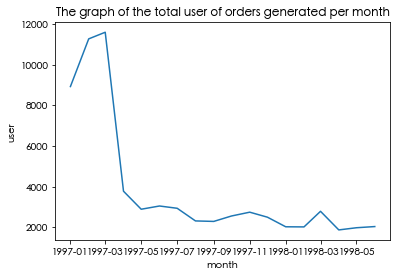

In [92]:
plt.plot(data_pivot["用户"])
plt.title("The graph of the total user of orders generated per month")
plt.xlabel("month")
plt.ylabel("user")
plt.show()

* 每月平均每人产生的订单数

In [93]:
data_pivot["人均订单数"] = data_pivot["数量"] / data_pivot["用户"]
data_pivot

,数量,用户,金额,人均订单数
月份,,,,
1997-01-01,19416,8928,299060.17,2.174731
1997-02-01,24921,11272,379590.03,2.210877
1997-03-01,26159,11598,393155.27,2.255475
1997-04-01,9729,3781,142824.49,2.573129
1997-05-01,7275,2895,107933.30,2.512953
1997-06-01,7301,3054,108395.87,2.390635
1997-07-01,8131,2942,122078.88,2.763766
1997-08-01,5851,2320,88367.69,2.521983
1997-09-01,5729,2296,81948.80,2.495209


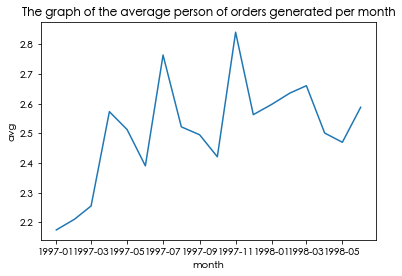

In [94]:
plt.plot(data_pivot["人均订单数"])
plt.title("The graph of the average person of orders generated per month")
plt.xlabel("month")
plt.ylabel("avg")
plt.show()

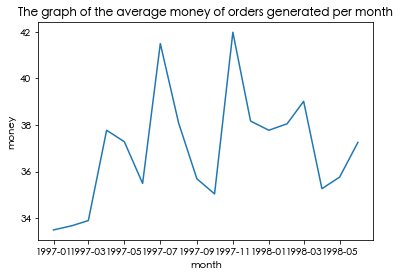

In [95]:
data_pivot["人均金额"] = data_pivot["金额"] / data_pivot["用户"]
plt.plot(data_pivot["人均金额"])
plt.title("The graph of the average money of orders generated per month")
plt.xlabel("month")
plt.ylabel("money")
plt.show()

In [96]:
data_pivot

,数量,用户,金额,人均订单数,人均金额
月份,,,,,
1997-01-01,19416,8928,299060.17,2.174731,33.496883
1997-02-01,24921,11272,379590.03,2.210877,33.675482
1997-03-01,26159,11598,393155.27,2.255475,33.898540
1997-04-01,9729,3781,142824.49,2.573129,37.774263
1997-05-01,7275,2895,107933.30,2.512953,37.282660
1997-06-01,7301,3054,108395.87,2.390635,35.493081
1997-07-01,8131,2942,122078.88,2.763766,41.495201
1997-08-01,5851,2320,88367.69,2.521983,38.089522
1997-09-01,5729,2296,81948.80,2.495209,35.691986


In [97]:
data_pivot.rename(
    columns={
        "用户":"每月产生的总订单数",
        "金额":"每月产生的总消费金额",
        "数量":"每月消费的总人数"
    },inplace=True
)
data_pivot

,每月消费的总人数,每月产生的总订单数,每月产生的总消费金额,人均订单数,人均金额
月份,,,,,
1997-01-01,19416,8928,299060.17,2.174731,33.496883
1997-02-01,24921,11272,379590.03,2.210877,33.675482
1997-03-01,26159,11598,393155.27,2.255475,33.898540
1997-04-01,9729,3781,142824.49,2.573129,37.774263
1997-05-01,7275,2895,107933.30,2.512953,37.282660
1997-06-01,7301,3054,108395.87,2.390635,35.493081
1997-07-01,8131,2942,122078.88,2.763766,41.495201
1997-08-01,5851,2320,88367.69,2.521983,38.089522
1997-09-01,5729,2296,81948.80,2.495209,35.691986


In [98]:
# data_pivot.to_csv("总体消费趋势分析.csv")

#  数据分析-用户个体消费趋势分析

* 第一次消费的用户与时间的关系图

In [99]:
# 按用户进行聚合,最早购入时间
data_min = data.pivot_table(index="用户",values="时间",aggfunc={"时间":"min"})
data_min

,时间
用户,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01
...,...
23566,1997-03-25
23567,1997-03-25
23568,1997-03-25


In [100]:
# 统计相同时间下第一次消费的用户人数
data_min_count = data_min.value_counts()
data_min_count

时间        
1997-02-08    363
1997-02-24    347
1997-02-04    346
1997-02-06    346
1997-03-04    340
             ... 
1997-01-08    213
1997-03-21    213
1997-01-07    211
1997-01-01    209
1997-01-04    174
Length: 84, dtype: int64

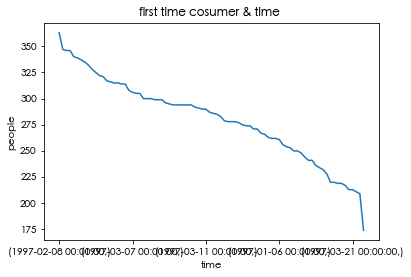

In [101]:
data_min_count.plot()
plt.title("first time cosumer & time ")
plt.xlabel("time")
plt.ylabel("people")
plt.show()


* 最后一次消费的用户与时间的关系图

In [102]:
# 按用户进行聚合,最晚购入时间
data_max = data.pivot_table(index="用户",values="时间",aggfunc={"时间":"max"})
data_max


,时间
用户,
1,1997-01-01
2,1997-01-12
3,1998-05-28
4,1997-12-12
5,1998-01-03
...,...
23566,1997-03-25
23567,1997-03-25
23568,1997-04-22


In [103]:
data_max_count = data_max.value_counts()
data_max_count

时间        
1997-02-08    221
1997-03-12    213
1997-02-04    210
1997-03-06    204
1997-02-27    202
             ... 
1997-07-18      4
1997-06-18      4
1997-07-04      4
1997-07-13      4
1997-10-19      4
Length: 546, dtype: int64

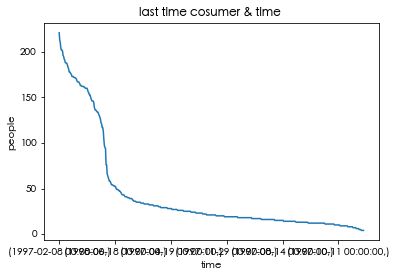

In [104]:
data_max_count.plot()
plt.title("last time cosumer & time ")
plt.xlabel("time")
plt.ylabel("people")
plt.show()


* 只消费一次的用户占比

In [105]:
# 找到只消费一次的用户
# data_once = data.pivot_table(
#     index="用户",values="时间",
# )

data_min


,时间
用户,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01
...,...
23566,1997-03-25
23567,1997-03-25
23568,1997-03-25


In [106]:
data_max

,时间
用户,
1,1997-01-01
2,1997-01-12
3,1998-05-28
4,1997-12-12
5,1998-01-03
...,...
23566,1997-03-25
23567,1997-03-25
23568,1997-04-22


In [107]:
data_mix = pd.concat([data_min,data_max],axis=1)
data_mix

,时间,时间
用户,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03
...,...,...
23566,1997-03-25,1997-03-25
23567,1997-03-25,1997-03-25
23568,1997-03-25,1997-04-22


In [108]:
data_only_once = data_mix[data_mix.iloc[:,0]==data_mix.iloc[:,1]]
data_only_once

,时间,时间
用户,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
6,1997-01-01,1997-01-01
10,1997-01-21,1997-01-21
12,1997-01-01,1997-01-01
...,...,...
23562,1997-03-25,1997-03-25
23565,1997-03-25,1997-03-25
23566,1997-03-25,1997-03-25


In [109]:
data_only_once_count = data_only_once.iloc[:,0].value_counts()
data_only_once_count

1997-02-08    199
1997-02-04    196
1997-03-12    181
1997-02-06    181
1997-02-03    178
             ... 
1997-01-08    107
1997-01-10     99
1997-01-04     95
1997-01-01     95
1997-01-07     91
Name: 时间, Length: 84, dtype: int64

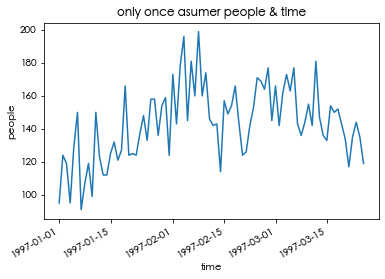

In [110]:
data_only_once_count.plot()
plt.title("only once asumer people & time")
plt.xlabel("time")
plt.ylabel("people")
plt.show()

* 每月只消费一次的用户总人数

In [111]:
data_only_once_count = pd.DataFrame(
    {
    "日期":data_only_once_count.index,
    "人数":data_only_once_count
})
data_only_once_count

,日期,人数
1997-02-08,1997-02-08,199
1997-02-04,1997-02-04,196
1997-03-12,1997-03-12,181
1997-02-06,1997-02-06,181
1997-02-03,1997-02-03,178
...,...,...
1997-01-08,1997-01-08,107
1997-01-10,1997-01-10,99
1997-01-04,1997-01-04,95
1997-01-01,1997-01-01,95


In [112]:
data_only_once_count.loc[:,"月份"]= data_only_once_count.loc[:,"日期"].values.astype("datetime64[M]")
data_only_once_count

,日期,人数,月份
1997-02-08,1997-02-08,199,1997-02-01
1997-02-04,1997-02-04,196,1997-02-01
1997-03-12,1997-03-12,181,1997-03-01
1997-02-06,1997-02-06,181,1997-02-01
1997-02-03,1997-02-03,178,1997-02-01
...,...,...,...
1997-01-08,1997-01-08,107,1997-01-01
1997-01-10,1997-01-10,99,1997-01-01
1997-01-04,1997-01-04,95,1997-01-01
1997-01-01,1997-01-01,95,1997-01-01


In [113]:
data_only_count_table = data_only_once_count.pivot_table(
    index="月份",
    values="人数",
    aggfunc={"人数":"sum"}
)
data_only_count_table


,人数
月份,
1997-01-01,3976
1997-02-01,4395
1997-03-01,3683


* 每月只消费一次的人数占总人数的占比

In [114]:
data_only_count_table

,人数
月份,
1997-01-01,3976
1997-02-01,4395
1997-03-01,3683


In [115]:
data_pivot.iloc[:,0]

月份
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: 每月消费的总人数, dtype: int64

In [116]:

data_percent = data_only_count_table.iloc[:,0]/data_pivot.iloc[:,0]
data_percent

月份
1997-01-01    0.204780
1997-02-01    0.176357
1997-03-01    0.140793
1997-04-01         NaN
1997-05-01         NaN
1997-06-01         NaN
1997-07-01         NaN
1997-08-01         NaN
1997-09-01         NaN
1997-10-01         NaN
1997-11-01         NaN
1997-12-01         NaN
1998-01-01         NaN
1998-02-01         NaN
1998-03-01         NaN
1998-04-01         NaN
1998-05-01         NaN
1998-06-01         NaN
dtype: float64

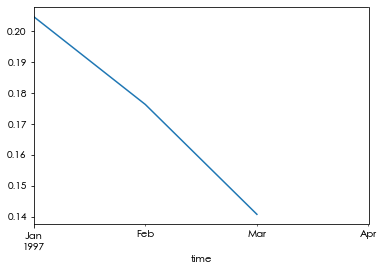

In [117]:
data_percent[:4].plot()
plt.xlabel("time")
plt.show()

* RFM模型

In [118]:
data

,用户,时间,数量,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


In [119]:
rfm = data.pivot_table(
    index="用户",
    values=["时间","数量","金额"],
    aggfunc={
        "时间":"max",
        "数量":"sum",
        "金额":"sum"
    }
)
rfm

,数量,时间,金额
用户,,,
1,1,1997-01-01,11.77
2,6,1997-01-12,89.00
3,16,1998-05-28,156.46
4,7,1997-12-12,100.50
5,29,1998-01-03,385.61
...,...,...,...
23566,2,1997-03-25,36.00
23567,1,1997-03-25,20.97
23568,6,1997-04-22,121.70


In [120]:

# 以数据集中的最新时间减去购买时间
r =(rfm["时间"].max()- rfm["时间"])/np.timedelta64(1,"D")
r

用户
1        545.0
2        534.0
3         33.0
4        200.0
5        178.0
         ...  
23566    462.0
23567    462.0
23568    434.0
23569    462.0
23570    461.0
Name: 时间, Length: 23570, dtype: float64

In [121]:
rfm["时间"] = r
rfm

,数量,时间,金额
用户,,,
1,1,545.0,11.77
2,6,534.0,89.00
3,16,33.0,156.46
4,7,200.0,100.50
5,29,178.0,385.61
...,...,...,...
23566,2,462.0,36.00
23567,1,462.0,20.97
23568,6,434.0,121.70


In [122]:
rfm.rename(inplace=True,columns={"时间":"R","数量":"F","金额":"M"})
# rfm = pd.DataFrame({
#     "R":rfm["R"],
#     "F":rfm["F"],
#     "M":rfm["M"],
# })
# rfm

In [123]:
# mean_list = rfm.mean()
# mean_list

In [124]:
# rfm.iloc[:,0][rfm.iloc[:,0]<mean_list[0]]=1
# rfm.iloc[:,0][rfm.iloc[:,0]>mean_list[0]]=0
# rfm

In [125]:
r_mean= rfm["R"].mean()
f_mean= rfm["F"].mean()
m_mean= rfm["M"].mean()
print(r_mean,f_mean,m_mean)

for i in range(0,len(rfm.iloc[:,0])):
    if rfm.iloc[i,0] > f_mean:
        rfm.iloc[i,0] = 1
    else:
        rfm.iloc[i,0] = 0
     
    if rfm.iloc[i,1] > r_mean:
        rfm.iloc[i,1] = 1
    else:
        rfm.iloc[i,1] = 0
    
    if rfm.iloc[i,2] > m_mean:
        rfm.iloc[i,2] = 1
    else:
        rfm.iloc[i,2] = 0


'''----------------优化代码----------''' 
# mean_list = rfm.mean()
# mean_list

# rfm.iloc[:,0][rfm.iloc[:,0]<mean_list[0]]=0
# rfm.iloc[:,0][rfm.iloc[:,0]>mean_list[0]]=1


# for i in range(1,len(rfm.iloc[0,:])):
#     rfm.iloc[:,i][rfm.iloc[:,i]>mean_list[i]]=1
#     rfm.iloc[:,i][rfm.iloc[:,i]<mean_list[i]]=0
# rfm

367.2216376750106 7.122655918540517 106.08042554094187


'----------------优化代码----------'

In [126]:
rfm

,F,R,M
用户,,,
1,0,1.0,0.0
2,0,1.0,0.0
3,1,0.0,1.0
4,0,0.0,0.0
5,1,0.0,1.0
...,...,...,...
23566,0,1.0,0.0
23567,0,1.0,0.0
23568,0,1.0,1.0


In [127]:
rfm = pd.DataFrame(rfm,dtype=int)
rfm

,F,R,M
用户,,,
1,0,1,0
2,0,1,0
3,1,0,1
4,0,0,0
5,1,0,1
...,...,...,...
23566,0,1,0
23567,0,1,0
23568,0,1,1


In [128]:
label_list = []
for i in range(0,len(rfm.iloc[:,0])):
    label_list.append(str(rfm.iloc[i,0])+ str(rfm.iloc[i,1])+ str(rfm.iloc[i,2]))
label_list

['010',
 '010',
 '101',
 '000',
 '101',
 '010',
 '101',
 '101',
 '000',
 '010',
 '000',
 '010',
 '010',
 '010',
 '010',
 '100',
 '010',
 '010',
 '111',
 '111',
 '010',
 '010',
 '010',
 '000',
 '101',
 '010',
 '111',
 '010',
 '101',
 '010',
 '101',
 '000',
 '101',
 '010',
 '000',
 '010',
 '101',
 '010',
 '101',
 '101',
 '010',
 '010',
 '001',
 '010',
 '010',
 '101',
 '101',
 '101',
 '010',
 '010',
 '101',
 '101',
 '000',
 '010',
 '010',
 '101',
 '010',
 '010',
 '010',
 '010',
 '111',
 '101',
 '101',
 '101',
 '000',
 '010',
 '010',
 '010',
 '111',
 '010',
 '010',
 '010',
 '010',
 '010',
 '010',
 '010',
 '010',
 '000',
 '010',
 '010',
 '101',
 '101',
 '100',
 '010',
 '010',
 '010',
 '101',
 '000',
 '101',
 '010',
 '010',
 '010',
 '111',
 '010',
 '101',
 '101',
 '101',
 '010',
 '101',
 '000',
 '010',
 '001',
 '101',
 '010',
 '010',
 '101',
 '010',
 '010',
 '111',
 '010',
 '101',
 '010',
 '000',
 '001',
 '010',
 '010',
 '000',
 '010',
 '010',
 '000',
 '010',
 '010',
 '010',
 '101',
 '101',


In [129]:
labels = {
    "000":"一般挽留客户",
    "001":"重要挽留客户",
    "011":"重要发展客户",
    "111":"重要价值客户",

    "010":"一般发展客户",
    "110":"一般价值客户",
    "100":"一般保持客户",
    "101":"重要保持客户",
}

In [130]:
rfm["用户类型"] = [labels[label_list[i]] for i in range(0,len(label_list))]

In [131]:
# rfm.to_csv("用户类型.csv")

In [132]:
rfm = pd.read_csv("用户类型.csv")
rfm

,用户,F,R,M,用户类型
0,1,0,1,0,一般发展客户
1,2,0,1,0,一般发展客户
2,3,1,0,1,重要保持客户
3,4,0,0,0,一般挽留客户
4,5,1,0,1,重要保持客户
...,...,...,...,...,...
23565,23566,0,1,0,一般发展客户
23566,23567,0,1,0,一般发展客户
23567,23568,0,1,1,重要发展客户
23568,23569,0,1,0,一般发展客户


In [133]:
rfm_labels = rfm.loc[:,"用户类型"].value_counts()
rfm_labels

一般发展客户    14074
重要保持客户     4554
一般挽留客户     3300
重要价值客户      787
重要挽留客户      331
重要发展客户      241
一般保持客户      206
一般价值客户       77
Name: 用户类型, dtype: int64

In [134]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei'] #
import matplotlib
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])
matplotlib.rcParams['font.family'] = ['Heiti TC']

[FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]


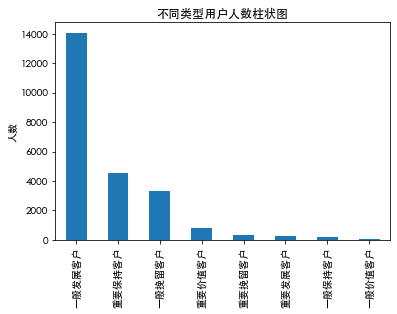

In [135]:
rfm_labels.plot(kind="bar")
plt.title("不同类型用户人数柱状图")
plt.ylabel("人数")
plt.show()

* 不同活跃度的用户分层

In [136]:
# data.to_csv("data.csv")
data = pd.read_csv("data.csv")


In [137]:
orders= data.pivot_table(
    index="用户",
    values="数量",
    columns="月份",
    aggfunc={
        "数量":"sum"
    }
).fillna(0)
orders

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,3.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
'''标记不同活跃度标签'''
orders.iloc[:,0][orders.iloc[:,0] !=0]="新用户"
orders.iloc[:,0][orders.iloc[:,0] == 0]="未注册"
orders

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1642/2936887220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.iloc[:,0][orders.iloc[:,0] == 0]="未注册"


月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户,,,,,,,,,,,,,,,,,,
1,新用户,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,新用户,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,新用户,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,新用户,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,新用户,3.0,0.0,3.0,3.0,2.0,2.0,0.0,3.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,未注册,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,未注册,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,未注册,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
for i in range(1,len(orders.iloc[0,:])):
    

    orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户") & (orders.iloc[:,i]!=0)]="活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户") & (orders.iloc[:,i]==0)]="不活跃"
    

    orders.iloc[:,i][(orders.iloc[:,i-1]=="未注册") & (orders.iloc[:,i]!=0)]="新用户"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="未注册") & (orders.iloc[:,i]==0)]="未注册"
    
    orders.iloc[:,i][(orders.iloc[:,i-1]=="不活跃") & (orders.iloc[:,i]!=0)]="活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="不活跃") & (orders.iloc[:,i]==0)]="流失"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="活跃") & (orders.iloc[:,i]!=0)]="持续活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="活跃") & (orders.iloc[:,i]==0)]="不活跃"


    orders.iloc[:,i][(orders.iloc[:,i-1]=="流失") & (orders.iloc[:,i]!=0)]="回流"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="流失") & (orders.iloc[:,i]==0)]="流失"

    orders.iloc[:,i][(orders.iloc[:,i-1]=="持续活跃") & (orders.iloc[:,i]!=0)]="持续活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="持续活跃") & (orders.iloc[:,i]==0)]="活跃"
 

    orders.iloc[:,i][(orders.iloc[:,i-1]=="回流") & (orders.iloc[:,i]!=0)]="活跃"
    orders.iloc[:,i][(orders.iloc[:,i-1]=="回流") & (orders.iloc[:,i]==0)]="不活跃"



/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1642/2538336168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户") & (orders.iloc[:,i]!=0)]="活跃"
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1642/2538336168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.iloc[:,i][(orders.iloc[:,i-1]=="新用户") & (orders.iloc[:,i]==0)]="不活跃"
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1642/2538336168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [140]:
orders

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户,,,,,,,,,,,,,,,,,,
1,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
2,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
3,新用户,不活跃,活跃,持续活跃,活跃,不活跃,流失,流失,流失,流失,回流,不活跃,流失,流失,流失,流失,回流,不活跃
4,新用户,不活跃,流失,流失,流失,流失,流失,回流,不活跃,流失,流失,回流,不活跃,流失,流失,流失,流失,流失
5,新用户,活跃,不活跃,活跃,持续活跃,持续活跃,持续活跃,活跃,持续活跃,活跃,不活跃,活跃,持续活跃,活跃,不活跃,流失,流失,流失
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,未注册,未注册,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
23567,未注册,未注册,新用户,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失
23568,未注册,未注册,新用户,活跃,不活跃,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失,流失


* 统计不同活跃度的用户人数

In [141]:
counts_ = orders.apply(lambda x:pd.value_counts(x))
#缺失值用0填充
counts_.fillna(0)

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
不活跃,0.0,6689.0,7952.0,7558.0,1711.0,1323.0,1500.0,1506.0,1174.0,1172.0,1123.0,1285.0,1266.0,1006.0,939.0,1418.0,926.0,970.0
回流,0.0,0.0,0.0,352.0,583.0,1167.0,1074.0,835.0,849.0,985.0,1033.0,937.0,733.0,794.0,1152.0,685.0,669.0,798.0
持续活跃,0.0,0.0,369.0,741.0,834.0,755.0,650.0,537.0,477.0,480.0,504.0,486.0,463.0,415.0,470.0,409.0,412.0,415.0
新用户,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
未注册,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
活跃,0.0,1157.0,1907.0,1922.0,1199.0,836.0,841.0,745.0,711.0,602.0,707.0,690.0,581.0,563.0,603.0,573.0,602.0,478.0
流失,0.0,0.0,6094.0,12997.0,19243.0,19489.0,19505.0,19947.0,20359.0,20331.0,20203.0,20172.0,20527.0,20792.0,20406.0,20485.0,20961.0,20909.0


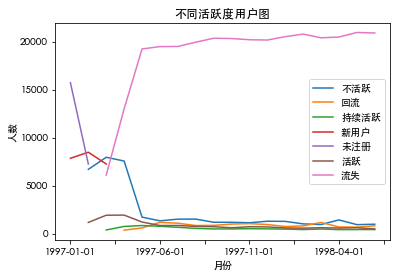

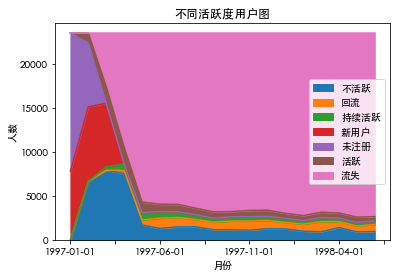

In [142]:
# 转置xy周
counts_T  = counts_.T

counts_T.plot()
plt.title("不同活跃度用户图")
plt.ylabel("人数")
plt.show()

counts_T.plot.area()
plt.title("不同活跃度用户图")
plt.ylabel("人数")
plt.show()

* 用户购买周期

In [143]:
file_path = r"CDNOW_master.txt"
data = pd.read_csv(file_path,names=["用户","时间","数量","金额"],sep="\s+")
clean_data = pd.to_datetime(data['时间'],format="%Y%m%d")
data['时间'] = clean_data
data

,用户,时间,数量,金额
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [144]:
data_group = data.groupby(["用户"])
data_group_time = data_group["时间"]

# -----------------------------------------
# # for a,b in data_group:
# #     print(a,b)
#________________output________________"
# 1    用户          时间  数量     金额          月份
# 0   1  1997-01-01   1  11.77  1997-01-01
# 2    用户          时间  数量    金额          月份
# 1   2  1997-01-12   1  12.0  1997-01-01
# 2   2  1997-01-12   5  77.0  1997-01-01
# 3    用户          时间  数量     金额          月份
# 3   3  1997-01-02   2  20.76  1997-01-01
# 4   3  1997-03-30   2  20.76  1997-03-01
# 5   3  1997-04-02   2  19.54  1997-04-01
# 6   3  1997-11-15   5  57.45  1997-11-01
# 7   3  1997-11-25   4  20.96  1997-11-01
# 8   3  1998-05-28   1  16.99  1998-05-01
# -----------------------------------------
# -----------------------------------------
# for a ,b in data_group_time:
#     print(a,b)
#________________output________________"
# 1 0    1997-01-01
# Name: 时间, dtype: object
# 2 1    1997-01-12
# 2    1997-01-12
# Name: 时间, dtype: object
# 3 3    1997-01-02
# 4    1997-03-30
# 5    1997-04-02
# 6    1997-11-15
# 7    1997-11-25
# 8    1998-05-28
# -----------------------------------------

In [145]:
# 组内减去前一个时间
# 用户两次购买的时间间隔
periods = data_group_time.apply(lambda x: x-x.shift())/np.timedelta64(1,"D")
periods

0         NaN
1         NaN
2         0.0
3         NaN
4        87.0
         ... 
69654    11.0
69655    17.0
69656     NaN
69657     NaN
69658     1.0
Name: 时间, Length: 69659, dtype: float64

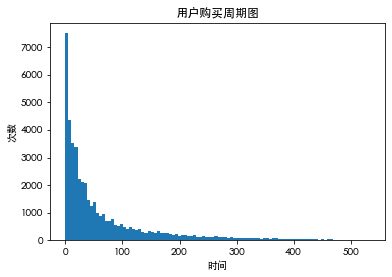

In [146]:
periods.plot.hist(bins=100)

plt.xlabel("时间")
plt.ylabel("次数")
plt.title("用户购买周期图")
plt.show()

* 用户生命周期

In [147]:
# file_path = r"CDNOW_master.txt"
# # names 表名
# # sep 空格分格
# data = pd.read_csv(file_path,names=["用户","时间","数量","金额"],sep="\s+")


In [148]:
data_max = data.pivot_table(index="用户",values="时间",aggfunc={"时间":"max"})
data_min = data.pivot_table(index="用户",values="时间",aggfunc={"时间":"min"})

In [149]:
lives = (data_max - data_min)/np.timedelta64(1,"D")
lives

,时间
用户,
1,0.0
2,0.0
3,511.0
4,345.0
5,367.0
...,...
23566,0.0
23567,0.0
23568,28.0


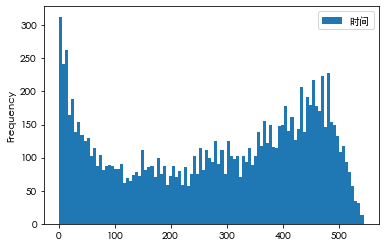

In [150]:
# > 0 过滤只购买一次的用户
lives[lives>0].plot.hist(bins=100)
plt.show()

In [151]:
orders[orders=="未注册"] = 0
orders[orders=="流失"] = 0
orders[orders=="新用户"] ="引入期"
orders[orders=="持续活跃"] ="成熟期"
orders[orders=="回流"] ="休眠期"


In [156]:
for i in range(1,len(orders.iloc[0,:])):
    orders.iloc[:,i][(orders.iloc[:,i-1]=="引入期") & (orders.iloc[:,i]=="不活跃")] ="引入期"

    orders.iloc[:,i][(orders.iloc[:,i-1]=="引入期") & (orders.iloc[:,i]=="活跃")] ="成长期"
 
 
    orders.iloc[:,i][(orders.iloc[:,i-1]=="回流") & (orders.iloc[:,i]=="活跃")] ="成熟期"

    orders.iloc[:,i][(orders.iloc[:,i-1]=="休眠期") & (orders.iloc[:,i]=="活跃")] ="成熟期"

    orders.iloc[:,i][(orders.iloc[:,i-1]=="成熟期") & (orders.iloc[:,i]=="活跃")] ="休眠期"

    orders.iloc[:,i][(orders.iloc[:,i-1]=="流失期") & (orders.iloc[:,i]=="活跃")] ="休眠期"

    orders[orders=="不活跃"] ="流失期"
    # orders[orders==0]==np.nan   

    
orders

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户,,,,,,,,,,,,,,,,,,
1,引入期,引入期,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,引入期,引入期,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,引入期,引入期,成长期,成熟期,休眠期,流失期,0,0,0,0,休眠期,流失期,0,0,0,0,休眠期,流失期
4,引入期,引入期,0,0,0,0,0,休眠期,流失期,0,0,休眠期,流失期,0,0,0,0,0
5,引入期,成长期,流失期,休眠期,成熟期,成熟期,成熟期,休眠期,成熟期,休眠期,流失期,休眠期,成熟期,休眠期,流失期,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,引入期,流失期,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,引入期,流失期,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,引入期,成长期,流失期,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
# 统计每个月所在不同生命阶段的用户总人数
lives = orders.apply(pd.value_counts)
lives

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
0,15724.0,7248.0,6094.0,12997.0,19243.0,19489.0,19505.0,19947.0,20359.0,20331.0,20203.0,20172.0,20527.0,20792.0,20406.0,20485.0,20961.0,20909.0
引入期,7846.0,15165.0,7248.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
成长期,NaN,1157.0,1907.0,1032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
流失期,NaN,NaN,7952.0,7558.0,1711.0,1323.0,1500.0,1506.0,1174.0,1172.0,1123.0,1285.0,1266.0,1006.0,939.0,1418.0,926.0,970.0
成熟期,NaN,NaN,369.0,741.0,902.0,874.0,873.0,714.0,645.0,637.0,728.0,710.0,607.0,550.0,668.0,577.0,546.0,528.0
休眠期,NaN,NaN,NaN,1242.0,1714.0,1884.0,1692.0,1403.0,1392.0,1430.0,1516.0,1403.0,1170.0,1222.0,1557.0,1090.0,1137.0,1163.0


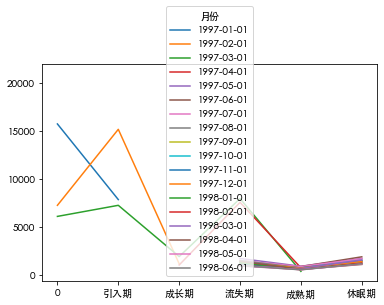

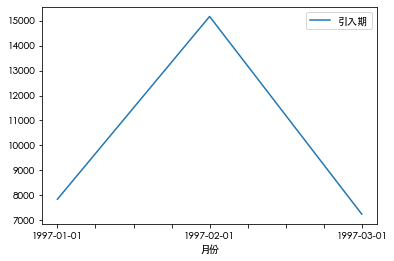

In [165]:
lives.plot()
plt.show()
lives.T.loc[:,"引入期"].plot()
plt.legend()


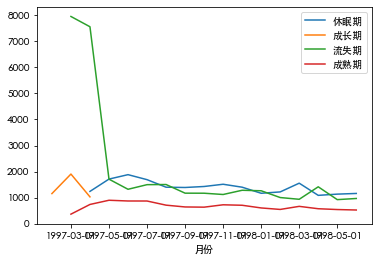

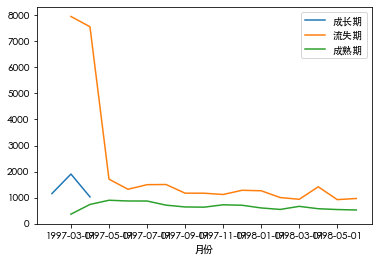

In [167]:
lives.T.loc[:,["休眠期","成长期","流失期","成熟期"]].plot()
plt.show()

* 复购率和回购率分析

In [7]:
# 复购率
file_path = r"CDNOW_master.txt"
# names 表名
# sep 空格分格
data = pd.read_csv(file_path,names=["用户","时间","数量","金额"],sep="\s+")

clean_data = pd.to_datetime(data['时间'],format="%Y%m%d")
# clean_data
data['时间'] = clean_data
# data
data_month = clean_data.values.astype("datetime64[M]")
# data_month
data["月份"] = data_month
data

,用户,时间,数量,金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


In [10]:
data_id = data.pivot_table(
    index="用户",
    values="数量",
    columns="月份",
    aggfunc={"数量":"count"}
)
data_id

月份,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23567,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23568,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 统计每个月产生订单的总人数
total_user = data_id.count()
total_user

月份
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
dtype: int64

In [16]:
# 统计每个月复购人数（产生订单次数>=2的人数）
twice_buy_user =data_id[data_id>=2].count()
twice_buy_user

月份
1997-01-01     844
1997-02-01    1178
1997-03-01    1479
1997-04-01     631
1997-05-01     436
1997-06-01     458
1997-07-01     469
1997-08-01     355
1997-09-01     352
1997-10-01     380
1997-11-01     410
1997-12-01     410
1998-01-01     324
1998-02-01     315
1998-03-01     473
1998-04-01     286
1998-05-01     298
1998-06-01     323
dtype: int64

In [17]:
# 复购率
twice_percent= twice_buy_user/total_user
twice_percent

月份
1997-01-01    0.107571
1997-02-01    0.122288
1997-03-01    0.155292
1997-04-01    0.223600
1997-05-01    0.196929
1997-06-01    0.195810
1997-07-01    0.215138
1997-08-01    0.200339
1997-09-01    0.202415
1997-10-01    0.206634
1997-11-01    0.202170
1997-12-01    0.219957
1998-01-01    0.210800
1998-02-01    0.203095
1998-03-01    0.229612
1998-04-01    0.199026
1998-05-01    0.200269
1998-06-01    0.214475
dtype: float64

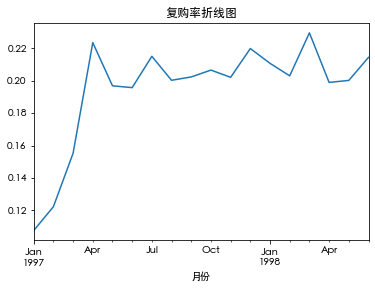

In [20]:
twice_percent.plot()
plt.title("复购率折线图")
plt.show()

In [22]:
# 回购率
repurchase_count = pd.Series(0,index=data_id.columns)


for i in range(1,len(data_id.iloc[0,:])):
    repurchase_count[i] = data_id.iloc[:,i][
        (data_id.iloc[:,i-1]>0)&(data_id.iloc[:,i]>0)
    ].count()

In [23]:
repurchase_count

月份
1997-01-01       0
1997-02-01    1157
1997-03-01    1681
1997-04-01    1773
1997-05-01     852
1997-06-01     747
1997-07-01     746
1997-08-01     604
1997-09-01     528
1997-10-01     532
1997-11-01     624
1997-12-01     632
1998-01-01     512
1998-02-01     472
1998-03-01     571
1998-04-01     518
1998-05-01     459
1998-06-01     446
dtype: int64

In [24]:
repurchase_rate = repurchase_count/total_user
repurchase_rate

月份
1997-01-01    0.000000
1997-02-01    0.120108
1997-03-01    0.176501
1997-04-01    0.628278
1997-05-01    0.384824
1997-06-01    0.319367
1997-07-01    0.342202
1997-08-01    0.340858
1997-09-01    0.303623
1997-10-01    0.289288
1997-11-01    0.307692
1997-12-01    0.339056
1998-01-01    0.333116
1998-02-01    0.304320
1998-03-01    0.277184
1998-04-01    0.360473
1998-05-01    0.308468
1998-06-01    0.296149
dtype: float64

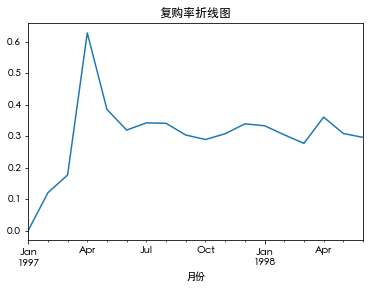

In [25]:
repurchase_rate.plot()
plt.title("复购率折线图")
plt.show()